In [248]:
import numpy as np
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
import os

In [249]:

if os.name == 'nt':
    font_family = "Malgun Gothic"
else:
    font_family = "AppleGothic"
    
sns.set(font=font_family, rc={"axes.unicode_minus" : False })

In [250]:

# csv 파일 로드
PATH = "AAOS.csv"
df = pd.read_csv(PATH, encoding='cp949')
# column_means = df.mean()
# df_filled = df.fillna(df.mean())
# df.iloc[:, 2:] = df.iloc[:, 2:].apply(lambda col: col.fillna(col.mean()))

df.shape
print(df.head())
print(df.columns)

    지점          일시  0.5M 평균 습도(%)  1.5M 평균 습도(%)  4.0M 평균 습도(%)  \
0  119  2003.12.10           70.0           67.0           66.0   
1  119  2003.12.11           66.0           63.0           63.0   
2  119  2003.12.12           72.0           69.0           68.0   
3  119  2003.12.13           75.0           72.0           71.0   
4  119  2003.12.14           71.0           68.0           66.0   

   10CM 일 토양수분(%)  20CM 일 토양수분(%)  30CM 일 토양수분(%)  50CM 일 토양수분(%)  대형증발량(mm)  \
0            18.0            20.0            24.0            33.0        NaN   
1            18.0            21.0            24.0            33.0        NaN   
2            18.0            21.0            24.0            33.0        NaN   
3            18.0            21.0            24.0            33.0        NaN   
4            18.0            21.0            24.0            33.0        NaN   

   ...  0.5M 일 지중온도(°C)  1.0M 일 지중온도(°C)  1.5M 일 지중온도(°C)  3.0M 일 지중온도(°C)  \
0  ...              NaN              N

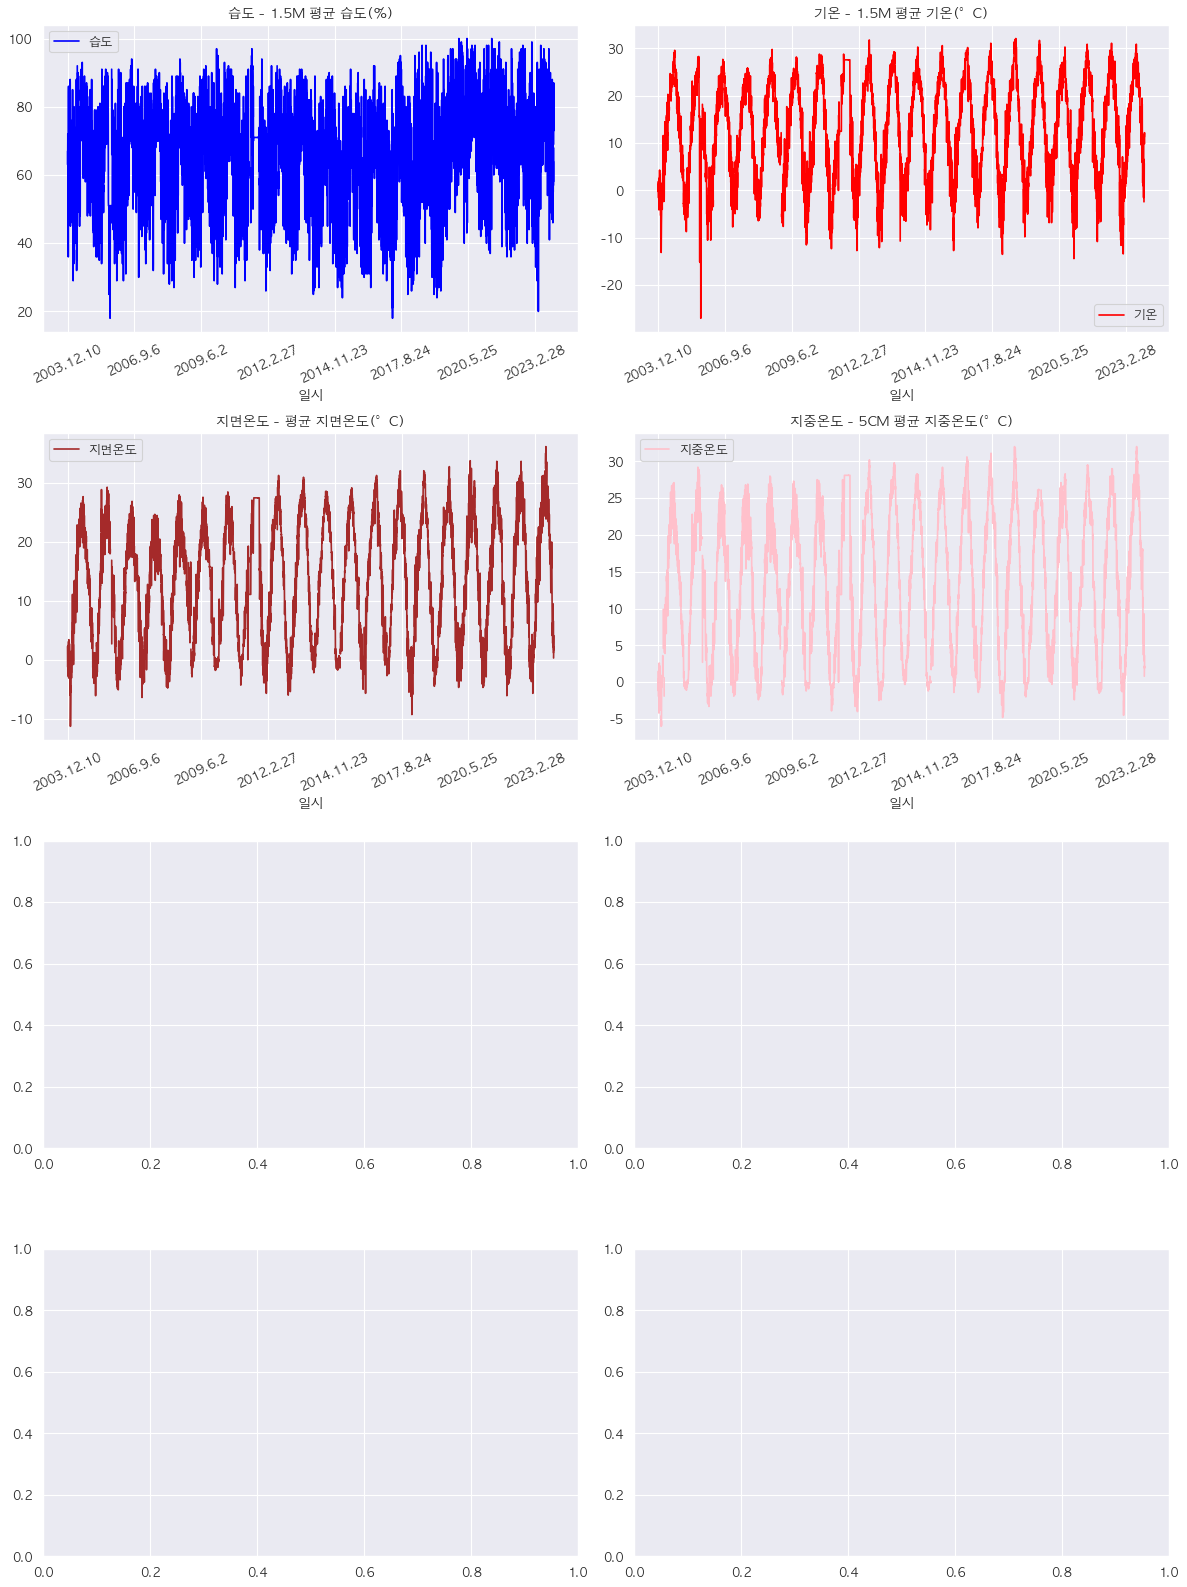

In [251]:
titles = [
    "습도",
    # "토양수분",
    # "증발량",
    "기온",
    # "풍속",
    "지면온도",
    "지중온도",
    # "조도"
]

feature_keys = [
    "1.5M 평균 습도(%)",
    # "10CM 일 토양수분(%)",
    # "소형증발량(mm)",
    "1.5M 평균 기온(°C)",
    # "1.5M 평균 풍속(m/s)",
    "평균 지면온도(°C)",
    "5CM 평균 지중온도(°C)",
    # "일 평균 조도(10lux)"
]

colors = [
    "blue",
    # "orange",
    # "green",
    "red",
    # "purple",
    "brown",
    "pink",
    # "gray"
]

date_time_key = "일시"


def show_raw_visualization(data):
    time_data = data[date_time_key]
    fig, axes = plt.subplots(
        nrows=4, ncols=2, figsize=(15, 20), dpi=80, facecolor="w", edgecolor="k"
    )
    for i in range(len(feature_keys)):
        key = feature_keys[i]
        c = colors[i % (len(colors))]
        t_data = data[key]
        t_data.index = time_data
        t_data.head()
        ax = t_data.plot(
            ax=axes[i // 2, i % 2],
            color=c,
            title="{} - {}".format(titles[i], key),
            rot=25,
        )
        ax.legend([titles[i]])
    plt.tight_layout()


show_raw_visualization(df)

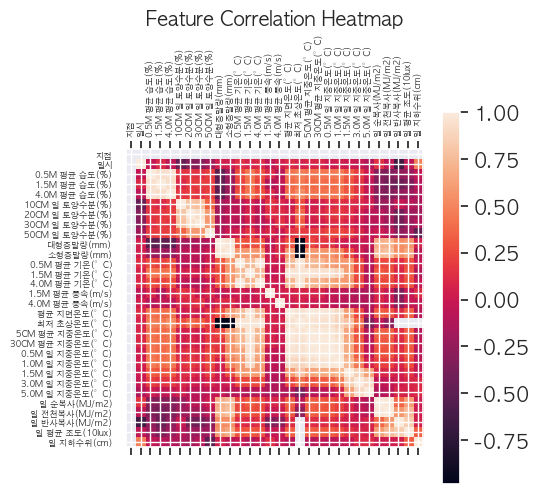

In [252]:
def show_heatmap(data):
    # 특성 간 상관 행렬 계산
    correlation_matrix = data.corr()

    # 히트맵 플로팅
    plt.matshow(correlation_matrix)
    
    # x축과 y축의 눈금 설정
    plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, fontsize=6, rotation=90)
    plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, fontsize=6)

    # 컬러바 추가
    cb = plt.colorbar()
    cb.ax.tick_params(labelsize=14)

    # 그래프 제목 설정
    plt.title("Feature Correlation Heatmap", fontsize=14)

    # 그래프 출력
    plt.show()

# 날짜 열을 Datetime 형식으로 변환
df['일시'] = pd.to_datetime(df['일시'])

# show_heatmap 함수 호출
show_heatmap(df)

In [239]:
split_fraction = 0.715
train_split = int(split_fraction * int(df.shape[0]))
step = 1

past = 720
future = 1
learning_rate = 0.001
batch_size = 256
epochs = 50


def normalize(data, train_split):
    data_mean = data[:train_split].mean(axis=0)
    data_std = data[:train_split].std(axis=0)
    return (data - data_mean) / data_std

In [240]:

print(
    "The selected parameters are:",
    # ", ".join([titles[i] for i in [0,1,2,3,4,5,6,7]]),
    ", ".join([titles[i] for i in [0,1,2, 3]]),
)

# selected_features = [feature_keys[i] for i in [0,1,2,3,4,5,6,7]]
selected_features = [feature_keys[i] for i in [0,1,2,3]]
features = df[selected_features]
features.index = df[date_time_key]
features.head()

# print(df)

features = normalize(features.values, train_split)
features = pd.DataFrame(features)
features.head()

train_data = features.loc[0 : train_split - 1]
val_data = features.loc[train_split:]

print(features)
print(train_split)
print(train_data)
print(feature_keys)


The selected parameters are: 습도, 기온, 지면온도, 지중온도
             0         1         2         3
0     0.276553 -1.335017 -1.435296 -1.564124
1    -0.013778 -1.005812 -1.077567 -1.207974
2     0.421718 -1.180097 -1.343309 -1.438424
3     0.639466 -1.218827 -1.343309 -1.490799
4     0.349136 -1.054225 -1.067346 -1.312724
...        ...       ...       ...       ...
7281  0.127785  0.041067  0.062215  0.039681
7282  0.421718 -0.095656  0.062215  0.039681
7283  1.728207 -0.008514  0.062215  0.039681
7284  0.712049 -0.008514  0.062215  0.039681
7285  1.292711 -0.231212  0.062215  0.039681

[7286 rows x 4 columns]
5209
             0         1         2         3
0     0.276553 -1.335017 -1.435296 -1.564124
1    -0.013778 -1.005812 -1.077567 -1.207974
2     0.421718 -1.180097 -1.343309 -1.438424
3     0.639466 -1.218827 -1.343309 -1.490799
4     0.349136 -1.054225 -1.067346 -1.312724
...        ...       ...       ...       ...
5204 -1.102518 -0.444227 -0.147469 -0.286172
5205 -1.247683 -0.5507

In [241]:
start = past + future
end = start + train_split

# x_train = train_data[[i for i in range(7)]].values
x_train = train_data[[i for i in range(3)]].values
y_train = features.iloc[start:end][[1]]

sequence_length = int(past / step)

In [242]:
dataset_train = keras.preprocessing.timeseries_dataset_from_array(
    x_train,
    y_train,
    sequence_length=sequence_length,
    sampling_rate=step,
    batch_size=batch_size,
)

In [243]:
x_end = len(val_data) - past - future

label_start = train_split + past + future

# x_val = val_data.iloc[:x_end][[i for i in range(7)]].values
x_val = val_data.iloc[:x_end][[i for i in range(3)]].values
y_val = features.iloc[label_start:][[1]]

dataset_val = keras.preprocessing.timeseries_dataset_from_array(
    x_val,
    y_val,
    sequence_length=sequence_length,
    sampling_rate=step,
    batch_size=batch_size,
)


for batch in dataset_train.take(1):
    inputs, targets = batch

print("Input shape:", inputs.numpy().shape)
print("Target shape:", targets.numpy().shape)

# Input shape: (256, 120, 7)
# Target shape: (256, 1)

Input shape: (256, 720, 3)
Target shape: (256, 1)


2023-12-14 03:03:44.168423: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_28' with dtype int32 and shape [4490]
	 [[{{node Placeholder/_28}}]]
2023-12-14 03:03:44.169727: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_13' with dtype int32
	 [[{{node Placeholder/_13}}]]


In [244]:
inputs = keras.layers.Input(shape=(inputs.shape[1], inputs.shape[2]))
lstm_out = keras.layers.LSTM(32)(inputs)
outputs = keras.layers.Dense(1)(lstm_out)

model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate), loss="mse")
model.summary()

Model: "model_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 720, 3)]          0         
                                                                 
 lstm_10 (LSTM)              (None, 32)                4608      
                                                                 
 dense_10 (Dense)            (None, 1)                 33        
                                                                 
Total params: 4,641
Trainable params: 4,641
Non-trainable params: 0
_________________________________________________________________


2023-12-14 03:03:45.345488: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-12-14 03:03:45.346415: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-12-14 03:03:45.346957: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

In [245]:
path_checkpoint = "model_checkpoint.h5"
es_callback = keras.callbacks.EarlyStopping(monitor="val_loss", min_delta=0, patience=5)

modelckpt_callback = keras.callbacks.ModelCheckpoint(
    monitor="val_loss",
    filepath=path_checkpoint,
    verbose=1,
    save_weights_only=True,
    save_best_only=True,
)

history = model.fit(
    dataset_train,
    epochs=epochs,
    validation_data=dataset_val,
    callbacks=[es_callback, modelckpt_callback],
)

Epoch 1/50


2023-12-14 03:03:46.349923: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_14' with dtype int32
	 [[{{node Placeholder/_14}}]]
2023-12-14 03:03:46.350518: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_8' with dtype int32 and shape [4490]
	 [[{{node Placeholder/_8}}]]
2023-12-14 03:03:46.518934: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32


18/18 [==============================] - ETA: 0s - loss: 0.4942

2023-12-14 03:03:52.113695: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_20' with dtype double and shape [1356,1]
	 [[{{node Placeholder/_20}}]]
2023-12-14 03:03:52.114096: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_14' with dtype int32
	 [[{{node Placeholder/_14}}]]
2023-12-14 03:03:52.256290: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype i


Epoch 1: val_loss improved from inf to 0.14645, saving model to model_checkpoint.h5
18/18 [==============================] - 6s 293ms/step - loss: 0.4942 - val_loss: 0.1465
Epoch 2/50
18/18 [==============================] - ETA: 0s - loss: 0.1518
Epoch 2: val_loss improved from 0.14645 to 0.13860, saving model to model_checkpoint.h5
18/18 [==============================] - 5s 271ms/step - loss: 0.1518 - val_loss: 0.1386
Epoch 3/50
18/18 [==============================] - ETA: 0s - loss: 0.1309
Epoch 3: val_loss improved from 0.13860 to 0.12160, saving model to model_checkpoint.h5
18/18 [==============================] - 5s 270ms/step - loss: 0.1309 - val_loss: 0.1216
Epoch 4/50
18/18 [==============================] - ETA: 0s - loss: 0.1183
Epoch 4: val_loss improved from 0.12160 to 0.11747, saving model to model_checkpoint.h5
18/18 [==============================] - 5s 269ms/step - loss: 0.1183 - val_loss: 0.1175
Epoch 5/50
18/18 [==============================] - ETA: 0s - loss: 0.

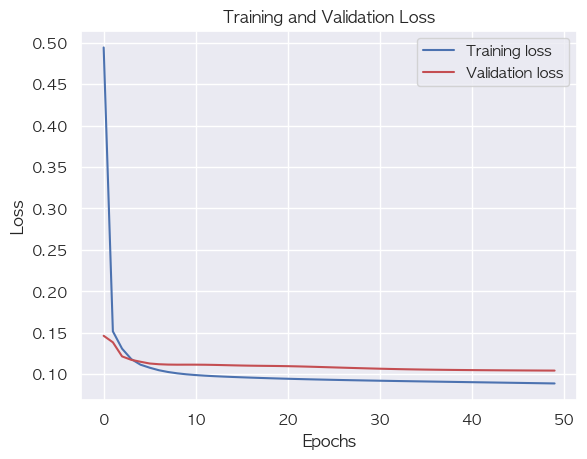

In [246]:

def visualize_loss(history, title):
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]
    epochs = range(len(loss))
    plt.figure()
    plt.plot(epochs, loss, "b", label="Training loss")
    plt.plot(epochs, val_loss, "r", label="Validation loss")
    plt.title(title)
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()


visualize_loss(history, "Training and Validation Loss")



2023-12-14 03:07:58.074134: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_8' with dtype int32 and shape [637]
	 [[{{node Placeholder/_8}}]]
2023-12-14 03:07:58.074676: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_28' with dtype int32 and shape [637]
	 [[{{node Placeholder/_28}}]]


1/8 [==>...........................] - ETA: 2s

2023-12-14 03:07:58.295847: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-12-14 03:07:58.297183: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-12-14 03:07:58.298148: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

8/8 [==============================] - 1s 35ms/step


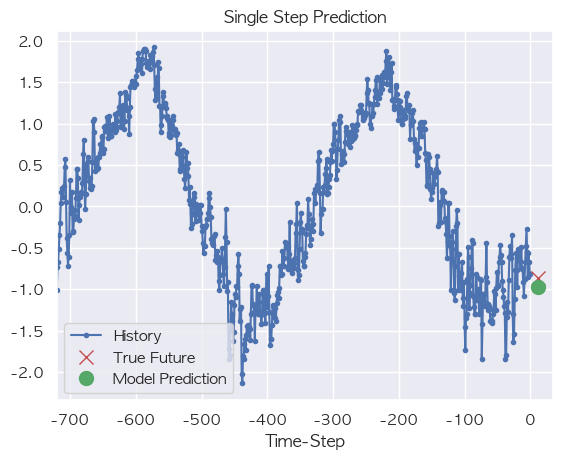

8/8 [==============================] - 0s 32ms/step


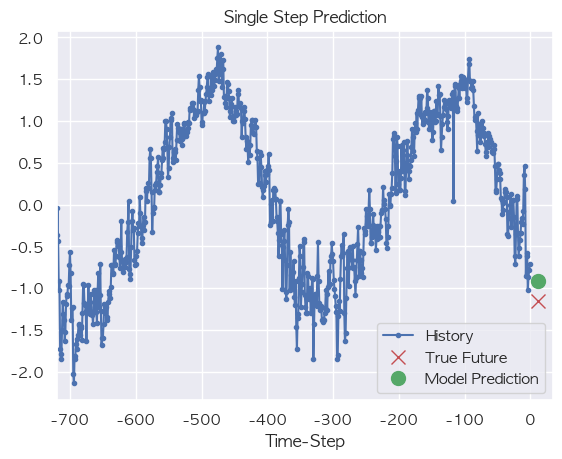

1/4 [======>.......................] - ETA: 0s

2023-12-14 03:07:59.383671: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-12-14 03:07:59.384766: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-12-14 03:07:59.385530: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

4/4 [==============================] - 0s 32ms/step


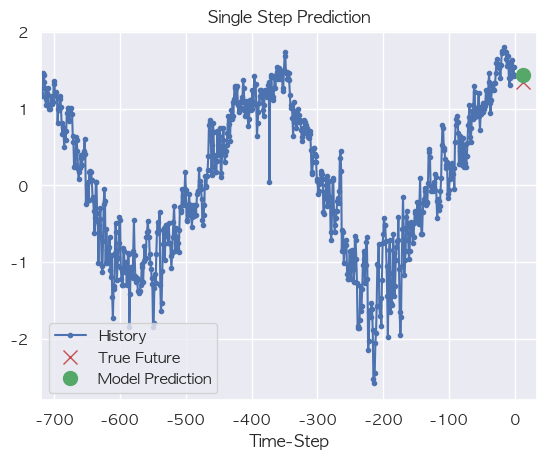

3/8 [==========>...................] - ETA: 0s

2023-12-14 03:07:59.738870: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_28' with dtype int32 and shape [637]
	 [[{{node Placeholder/_28}}]]
2023-12-14 03:07:59.739294: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_28' with dtype int32 and shape [637]
	 [[{{node Placeholder/_28}}]]


8/8 [==============================] - 0s 37ms/step


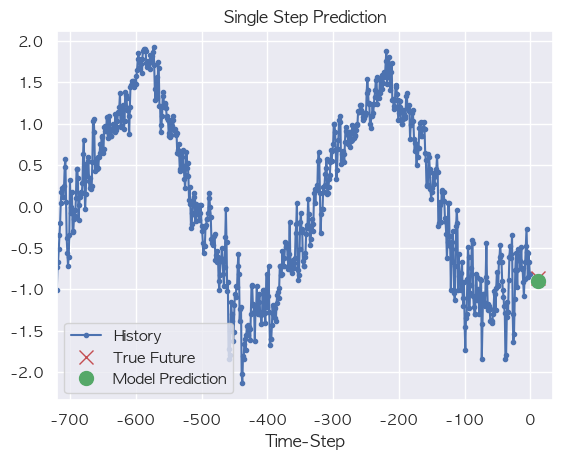

8/8 [==============================] - 0s 34ms/step


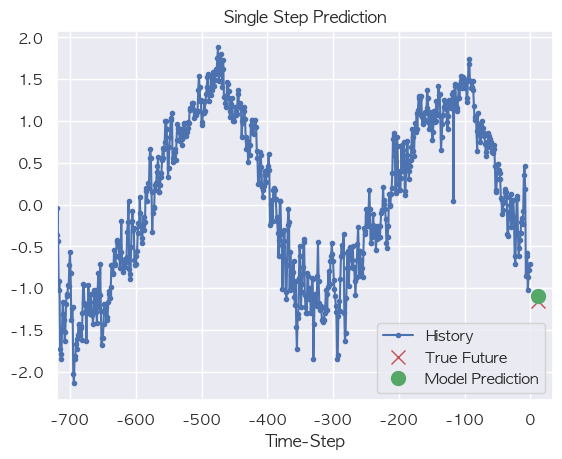

4/4 [==============================] - 0s 34ms/step


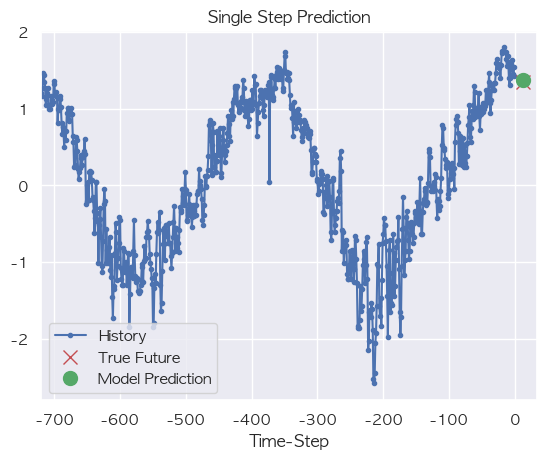

In [247]:

def show_plot(plot_data, delta, title):
    labels = ["History", "True Future", "Model Prediction"]
    marker = [".-", "rx", "go"]
    time_steps = list(range(-(plot_data[0].shape[0]), 0))
    if delta:
        future = delta
    else:
        future = 0

    plt.title(title)
    for i, val in enumerate(plot_data):
        if i:
            plt.plot(future, plot_data[i], marker[i], markersize=10, label=labels[i])
        else:
            plt.plot(time_steps, plot_data[i].flatten(), marker[i], label=labels[i])
    plt.legend()
    plt.xlim([time_steps[0], (future + 5) * 2])
    plt.xlabel("Time-Step")
    plt.show()
    return


for x, y in dataset_val.take(3):
    show_plot(
        [x[0][:, 1].numpy(), y[0].numpy(), model.predict(x)[0]],
        12,
        "Single Step Prediction",
    )
    
for x, y in dataset_val.take(3):
    show_plot(
        [x[0][:, 1].numpy(), y[0].numpy(), model.predict(x)[3]],
        12,
        "Single Step Prediction",
    )

4/4 [==============================] - 0s 6ms/step


ValueError: x and y must have same first dimension, but have shapes (1,) and (637,)

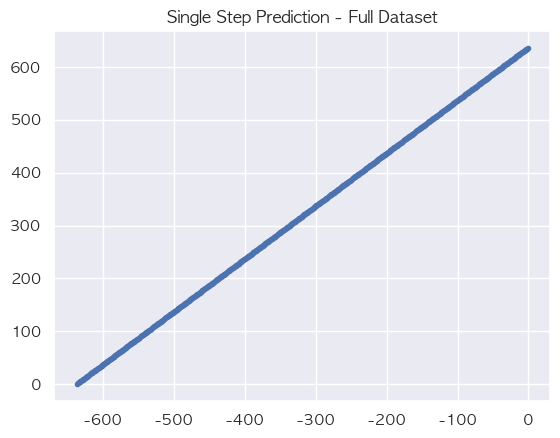

In [235]:
# from sklearn.metrics import mean_squared_error
# mse = mean_squared_error(train_data.flatten(), predicted_data.repeat(train_data.shape[0]))

def visualize_full_predictions(model, dataset_val):
    all_predictions = []
    all_actual_values = []
    
    for x, y in dataset_val:
        predictions = model.predict(x)
        all_predictions.extend(predictions[:, 0])
        all_actual_values.extend(y[:, 0].numpy())

    show_plot(
        [np.array(range(len(all_actual_values))), all_actual_values, all_predictions],
        12,
        "Single Step Prediction - Full Dataset",
    )

# 모델과 검증 데이터 세트를 활용한 전체 예측값 시각화
visualize_full_predictions(model, dataset_val)